In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Assignment: 
### 1. Simple optimization algorithms: 
Your assignment is to write a code using greedy, random walk or random search   to minimize the following simple one-dimensional cost function:

Cost(s) = (400 – (s – 21)2) $*$ sin(s$*$pi/6)

Constraints: s is integer-valued and 0 s 500

When applicable we will use the following basic neighborhood function: For each element $S_{current}$, the neighborhood $N(S_{current})$ is in the range (0,500) and is no more than 25 in distance from $S_{current}$.  To pick a point in the neighborhood for a search algorithm, pick a neighboring solution, s, randomly so that $\max(S_{current} -25,0)  \leq s \leq  min(S_{current} +25, 500)$.

## Part a
a.	Write a MATLAB function cost.m that implements the cost function, i.e. accepts input s, and returns COST(s).  Make sure the cost function is correct (i.e.$COST(10) \simeq -241.621$).  Submit a plot of the given cost function with respect to s over the range of s. 

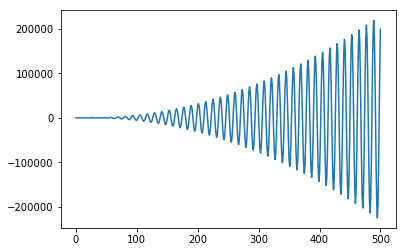

In [3]:
def cost(s):
    return (400 - pow(s-21,2)) * np.sin(s*np.pi/6)

s = np.linspace(0,500,501,True)
fig = plt.plot(s,cost(s))

## Part b
b.	Write a MATLAB function neighbor.m that implements the neighborhood function, taking a single input s, and outputting a single neighboring value snew. (Note: s is not a neighbor of itself.) 

In [4]:
def neighbor(s):
    rnd = np.random.randint(1,51) # random number ranging from 1 to 50 inclusive
    if rnd <= 25:
        snew = max(s-rnd,0) # s - 1 to s - 25, or 0
    else:
        snew = min(s+(rnd-25),500) # s + 1 to s + 25, since here rnd ranges from 26 to 50, or 500
    return snew

## Part c
c.	Write a MATLAB function RW.m (Random Walk) which implements the Random Walk algorithm described (as a pseudocode) on the next page. The function should have two inputs: a starting point sInitial, and a maximum number of iterations to run maxIter. 

The output of the function is a matrix Solution with each row corresponding to the results for each iteration and columns corresponding to the following variables for each row.
i – the iteration number (same as the row number)
sCurrent – the value of s at iteration i
sBest – the value of s that had the lowest cost in the history of the search  (best solution to date).
costCurrent – the current cost, i.e.cost (sCurrent)
costBest - the lowest cost in the history of the search
This function should call cost.m and neighbor.m where needed. The header of this function should thus read:	 function solution = RW(sInitial, maxIter) We encourage you to keep record of sCurrent, costCurrent, sBest and costBest in your solution matrix.



________________________________________
Algorithm RW(sInitial, maxIter)
Begin 
    sCurrent=sInitial; sBest=sCurrent;
    costCurrent = cost(sInitial);
    costBest=costCurrent;
    Repeat
        sCurrent=Perturb(sCurrent);//Perturb represents a call to the neighbor function from part (b) and you are replacing old sCurrent with a new sCurrent
        costCurrent=cost(sCurrent);
        If costCurrent<costBest then
            costBest=costCurrent;
            sBest=sCurrent;
        Endif   (go back to perturb around the new sCurrent)
    Until time to stop
    Return(Solution)
End Algorithm
________________________________________


In [5]:
def RW(sInitial, maxIter):
    
    iter_num = []
    current_s = []
    best_s = []
    current_cost = []
    best_cost = []
    
    i = 1
    sCurrent = sInitial
    sBest = sInitial
    costCurrent = cost(sInitial)
    costBest = costCurrent
    
    while i <= maxIter:
        
        iter_num.append(i)
        best_s.append(sBest)
        best_cost.append(costBest)
        
        sCurrent = neighbor(sCurrent)
        costCurrent = cost(sCurrent)
        if costCurrent < costBest:
            costBest = costCurrent
            sBest = sCurrent

        current_s.append(sCurrent)
        current_cost.append(costCurrent)

        i+=1
        
    Solution = pd.DataFrame({"i": iter_num, "sCurrent": current_s, "sBest": best_s, 
                             "costCurrent": current_cost, "costBest": best_cost})
    return Solution

In [6]:
Solution = RW(0, 5000)

cols = ['i', 'sCurrent', 'sBest', 'costCurrent', 'costBest']
Solution = Solution[cols]
Solution.head()

,i,sCurrent,sBest,costCurrent,costBest
0,1,11,0,-150.000000,-0.0
1,2,0,11,-0.000000,-150.0
2,3,0,11,-0.000000,-150.0
3,4,16,11,324.759526,-150.0
4,5,29,11,168.000000,-150.0


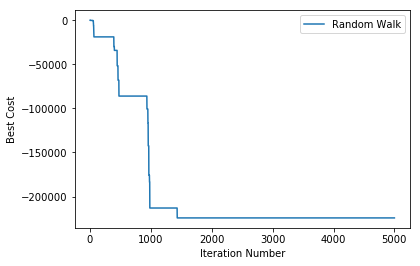

In [7]:
fig = plt.plot(Solution.i, Solution.costBest)
plt.xlabel('Iteration Number')
plt.ylabel('Best Cost')
plt.legend(['Random Walk'])

## Part d
d.	Write a MATLAB function RS.m which implements the RandomSampling algorithm described below (as pseudocode).  For Random Sampling define the neighborhood as the whole decision space.  With this neighborhood definition, the RandomSampling algorithm samples from all potential solutions at random. Follow the same conventions as in part (c).

In [8]:
def RS(sInitial, maxIter):
    
    iter_num = []
    current_s = []
    best_s = []
    current_cost = []
    best_cost = []
    
    i = 1
    sCurrent = sInitial
    sBest = sInitial
    costCurrent = cost(sInitial)
    costBest = costCurrent
    
    while i <= maxIter:
        
        iter_num.append(i)
        best_s.append(sBest)
        best_cost.append(costBest)
        
        neighbor_rs = sCurrent
        while neighbor_rs == sCurrent:
            neighbor_rs = np.random.randint(0,500)
            
        sCurrent = neighbor_rs
        costCurrent = cost(sCurrent)
        if costCurrent < costBest:
            costBest = costCurrent
            sBest = sCurrent

        current_s.append(sCurrent)
        current_cost.append(costCurrent)

        i+=1
        
    Solution = pd.DataFrame({"i": iter_num, "sCurrent": current_s, "sBest": best_s, 
                             "costCurrent": current_cost, "costBest": best_cost})
    return Solution

In [11]:
cols = ['i', 'sCurrent', 'sBest', 'costCurrent', 'costBest']
Solution_rs = RS(0, 5000)
Solution_rs = Solution_rs[cols]

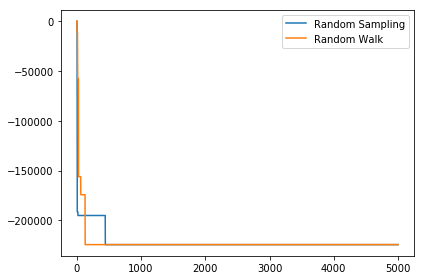

In [12]:
plt.plot(Solution_rs.i, Solution_rs.costBest)
plt.plot(Solution.i, Solution.costBest)
plt.legend(['Random Sampling', 'Random Walk'])
plt.tight_layout()

## Part e
i)	A MATLAB function GD.m (Greedy Deterministic) using a deterministic neighborhood definition: evaluate all solutions in the neighborhood defined by
max(s-10,0)  s  min(s+10, 500), except for s itself.  Include the necessary neighborhood (note that this neighborhood function is different from part b) and ‘improve’ coding within the GD.m function

In [13]:
def GD(sInitial, maxIter):
    
    iter_num = []
    current_s = []
    best_s = []
    current_cost = []
    best_cost = []
    
    i = 1
    sCurrent = sInitial
    sBest = sInitial
    costCurrent = cost(sInitial)
    costBest = costCurrent
    
    while i <= maxIter:
        
        iter_num.append(i)
        best_s.append(sBest)
        best_cost.append(costBest)
        
        # Find a neighbor
        start = np.maximum(sCurrent-10, 0)
        end = np.minimum(sCurrent+10, 500)

        best_neighbor_cost = cost(start)
        best_neighbor = start
        
        for x in range(start, end+1):
            curr_neighbor_cost = cost(x)
            if curr_neighbor_cost <= best_neighbor_cost:
                best_neighbor = x
                best_neighbor_cost = curr_neighbor_cost

        # End of finding a neighbor    
        
        sCurrent = best_neighbor
        costCurrent = cost(sCurrent)
        if costCurrent < costBest:
            costBest = costCurrent
            sBest = sCurrent

        current_s.append(sCurrent)
        current_cost.append(costCurrent)

        i+=1
        
    Solution = pd.DataFrame({"i": iter_num, "sCurrent": current_s, "sBest": best_s, 
                             "costCurrent": current_cost, "costBest": best_cost})
    return Solution

In [16]:
cols = ['i', 'sCurrent', 'sBest', 'costCurrent', 'costBest']
Solution_gd = GD(0, 5000)
Solution_gd = Solution_rs[cols]

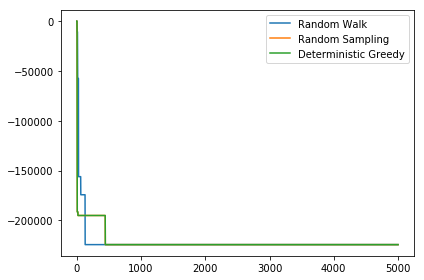

In [17]:
plt.plot(Solution.i, Solution.costBest)
plt.plot(Solution_rs.i, Solution_rs.costBest)
plt.plot(Solution_gd.i, Solution_gd.costBest)
plt.legend(['Random Walk', 'Random Sampling', 'Deterministic Greedy'])
plt.tight_layout()